In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
cluster = pd.read_csv("clusters.csv", index_col=0)
data = pd.read_csv("data.csv", index_col=0)

In [11]:
cluster.head()

,cluster,keywords,label,sentences
0,-1,"['company', 'need', 'employee', 'work', 'custo...",company need employee work customer,['EOS is one of the best tool to provide emplo...
1,0,"['team', 'u', 'work', 'working', 'company']",team u work working company,['as a team we work and help each other good ...
2,1,"['u', 'company', 'work', 'need', 'customer']",u company work need customer,['We have been having continuous changes - whi...
3,2,"['training', 'development', 'opportunity', 'pr...",training development opportunity program required,['overhaul your management and actually provi...
4,3,"['well', 'working', 'going', 'communication', ...",well working going communication everything,['nothing is working well from my perspective'...


In [4]:
clusters = cluster["cluster"]

In [5]:
comments = []
for i in range(24):
    comments.append('')

In [6]:
new_data = {"cluster" : [],"comments":[]}
new_data["cluster"] = clusters
new_data["comments"] = comments
new_dataframe = pd.DataFrame.from_dict(new_data)

In [7]:
for index,row in data.iterrows():
    index1 = new_dataframe[new_dataframe['cluster'] == row["cluster"]].index[0]
    new_dataframe.loc[new_dataframe.cluster == row["cluster"], 'comments'] = str(new_dataframe.iloc[index1]["comments"]) + str(row["comment_raw"])

In [ ]:
for index,row_data in new_dataframe.iterrows():
    
    wordcloud = WordCloud().generate(row_data["comments"])

    # Display the generated image:
    plt.title(row_data["cluster"])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("clusters_word_cloud/"+str(row_data["cluster"])+".jpg")

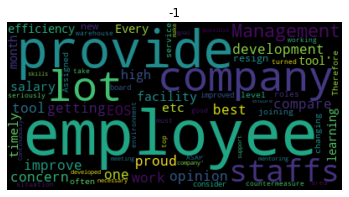